<a href="https://colab.research.google.com/github/dp1013/DAV51/blob/main/D11AD_51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Multiple Linear Regression

Aim:	Multiple Linear Regression in Python


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
job=pd.read_csv("multiple_linear_regression_dataset.csv")

In [ ]:
job

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X=job.drop("income",axis=1)
X

,age,experience
0,25,1
1,30,3
2,47,2
3,32,5
4,43,10
5,51,7
6,28,5
7,33,4
8,37,5
9,39,8


In [ ]:
y=job["income"]
y

0     30450
1     35670
2     31580
3     40130
4     47830
5     41630
6     41340
7     37650
8     40250
9     45150
10    27840
11    46110
12    36720
13    34800
14    51300
15    38900
16    63600
17    30870
18    44190
19    48700
Name: income, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(
    X, y, test_size=0.2)


In [ ]:
# creating a regression model
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
Coefficient_of_Determination=model.score(X_train,y_train)

In [ ]:
Coefficient_of_Determination

0.9830095633145418

In [ ]:
intercept=model.intercept

AttributeError: 'LinearRegression' object has no attribute 'intercept'

In [ ]:
# making predictions
predictions = model.predict(X_test)
predictions

array([44788.87774487, 36928.72921833, 30982.75449097, 40350.17015718])

In [ ]:
y_test

9     45150
7     37650
10    27840
15    38900
Name: income, dtype: int64

Text(0, 0.5, 'income')

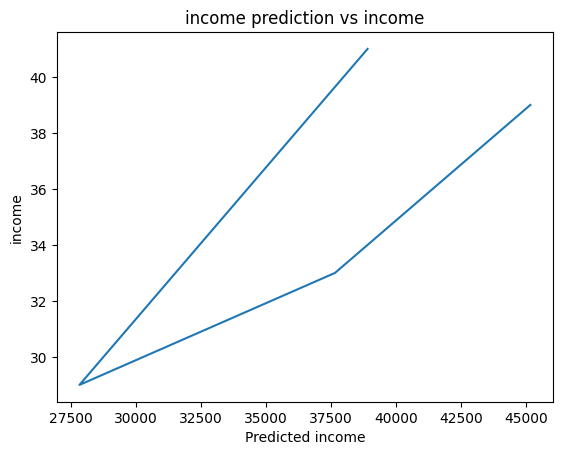

In [ ]:
plt.plot(y_test,X_test["age"]);

plt.title("income prediction vs income")
plt.xlabel("Predicted income")
plt.ylabel("income")

Text(0, 0.5, 'age')

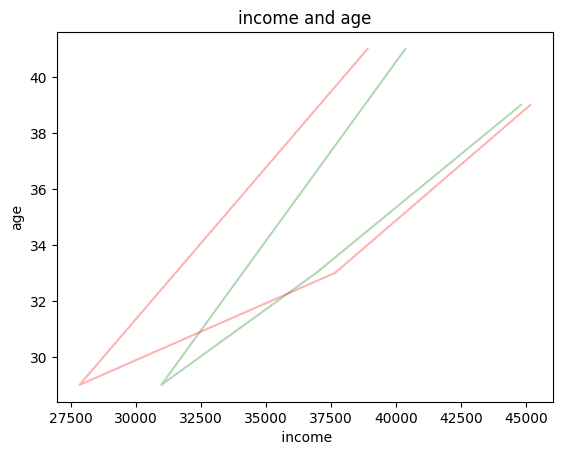

In [ ]:
overlapping = 0.3
plt.plot(predictions,X_test["age"],c='green', alpha=overlapping);
plt.plot(y_test,X_test["age"],c='red',alpha=overlapping);

plt.title("income and age")
plt.xlabel(" income")
plt.ylabel("age")

<Axes: xlabel='age', ylabel='income'>

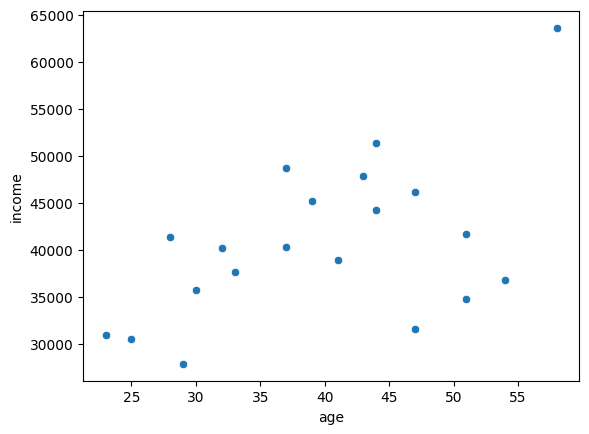

In [ ]:
sns.scatterplot(x='age',
                y='income', data=job)

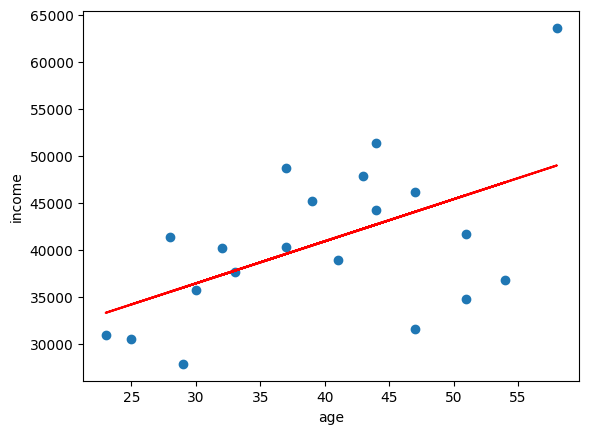

In [ ]:
age=job['age']
income=job['income']
plt.scatter(age, income)
plt.xlabel('age')
plt.ylabel('income')


# Convert the data into arrays
A = np.array(age)
B = np.array(income)

# Calculate the coefficients
b1, b0 = np.polyfit(age, income, 1)
# Add the regression line
plt.plot(A, b1*A + b0, color='red')
plt.show()

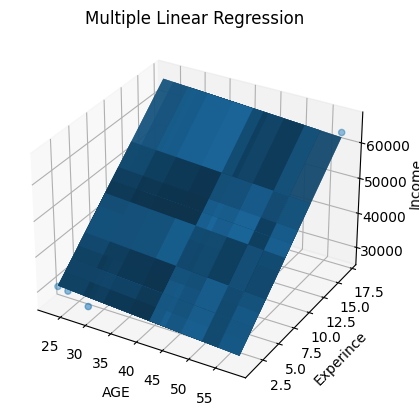

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Define the independent variables

experience=job["experience"]

# Add the data points
ax.scatter(age,	experience, income)

# Fit a plane using np.linalg.lstsq
A = np.vstack([age, 	experience, np.ones_like(age)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, income, rcond=None)

# Create a meshgrid for the plane
x_plane, y_plane = np.meshgrid(age, 	experience)
z_plane = plane_coef[0] * x_plane + plane_coef[1] * y_plane + plane_coef[2]

# Add the regression plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5)

# Add labels and title
ax.set_xlabel('AGE')
ax.set_ylabel('Experince')
ax.set_zlabel('Income')
plt.title('Multiple Linear Regression')

# Show the plot
plt.show()

Multiple regression in R

In [ ]:
job <- read.csv("multiple_linear_regression_dataset.csv")
head(job)

,age,experience,income
,<int>,<int>,<int>
1,25,1,30450
2,30,3,35670
3,47,2,31580
4,32,5,40130
5,43,10,47830
6,51,7,41630


In [ ]:
install.packages("caTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:

library(caTools)

# Splitting the data into training and testing sets
set.seed(123)  # Setting seed for reproducibility
split <- sample.split(job$income, SplitRatio = 0.8)
train_data <- subset(job, split == TRUE)
test_data <- subset(job, split == FALSE)

# Creating feature matrix (X) and target variable (y) for training set
X_train <- subset(train_data, select = -c(income))
y_train <- train_data$income

# Creating feature matrix (X) and target variable (y) for testing set
X_test <- subset(test_data, select = -c(income))
y_test <- test_data$income

# Creating a linear regression model
model <- lm(income ~ ., data = train_data)

# Print the summary of the model
summary(model)



Call:
lm(formula = income ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2415.8  -415.4   124.7   616.0  1536.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32203.81    1228.11  26.222 1.22e-12 ***
age          -112.83      36.25  -3.113  0.00824 ** 
experience   2151.82      93.40  23.040 6.33e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1197 on 13 degrees of freedom
Multiple R-squared:  0.9826,	Adjusted R-squared:  0.9799 
F-statistic: 367.1 on 2 and 13 DF,  p-value: 3.658e-12


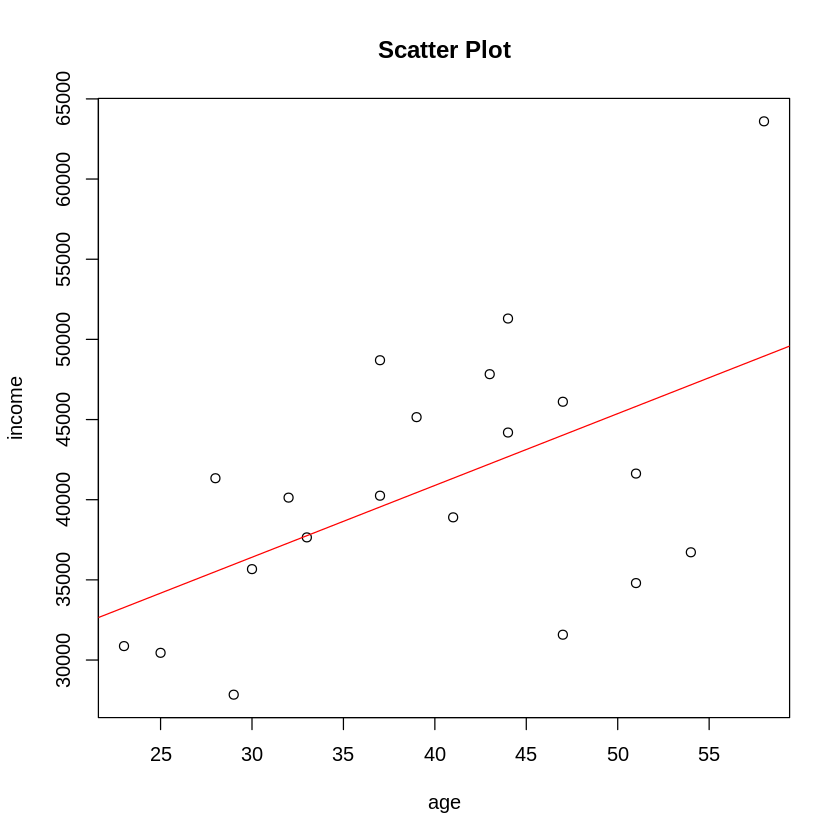

In [ ]:
# Assuming 'job' is your data frame in R

# Scatter plot
plot(job$age, job$income, xlab = 'age', ylab = 'income', main = 'Scatter Plot')

# Convert the data into vectors
A <- job$age
B <- job$income

# Calculate the coefficients
model <- lm(income ~ age, data = job)
b1 <- coef(model)[2]
b0 <- coef(model)[1]

# Add the regression line
abline(a = b0, b = b1, col = 'red')

